In [1]:
from pgnano.stats_analysis.primitives import PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from functools import partial
from pgnano.stats_analysis.coding_analysis_scripts import *
from scipy.stats import geom, halfnorm
from scipy.linalg import lstsq
from scipy.fft import fft
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import statistics

In [2]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P10_3,100)

['/data/datananoraw/data_analysis/10_3/09cb1f61-batch5.pod5', '/data/datananoraw/data_analysis/10_3/0b23e26f-batch10.pod5', '/data/datananoraw/data_analysis/10_3/0e940b5b-batch7.pod5', '/data/datananoraw/data_analysis/10_3/1fdd4589-batch8.pod5', '/data/datananoraw/data_analysis/10_3/2140fbcc-batch15.pod5', '/data/datananoraw/data_analysis/10_3/21c453ee-batch4.pod5', '/data/datananoraw/data_analysis/10_3/269a41f2-batch21.pod5', '/data/datananoraw/data_analysis/10_3/2dde8350-batch5.pod5', '/data/datananoraw/data_analysis/10_3/6235de73-batch6.pod5', '/data/datananoraw/data_analysis/10_3/7f0071c4-batch11.pod5', '/data/datananoraw/data_analysis/10_3/c689afea-batch13.pod5', '/data/datananoraw/data_analysis/10_3/c767459b-batch12.pod5', '/data/datananoraw/data_analysis/10_3/dc0e0091-batch7.pod5', '/data/datananoraw/data_analysis/10_3/e951f24f-batch3.pod5']
[('/data/datananoraw/data_analysis/10_3/0e940b5b-batch7.pod5', 130007480), ('/data/datananoraw/data_analysis/10_3/2140fbcc-batch15.pod5', 1

In [3]:
error = transform_signal_to_error(signal_data[0])

In [4]:
code = transform_error_to_code(error)

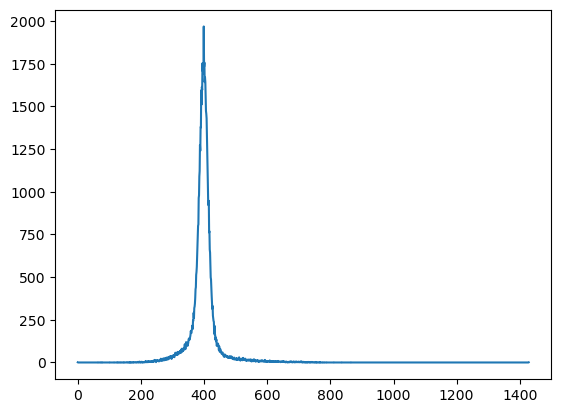

In [5]:
plt.plot(np.bincount(error - min(error)))

In [6]:
bit = 5

In [7]:
low_histogram_error, high_histogram_error = get_splitted_histograms(error,bit)

Text(0.5, 1.0, 'High')

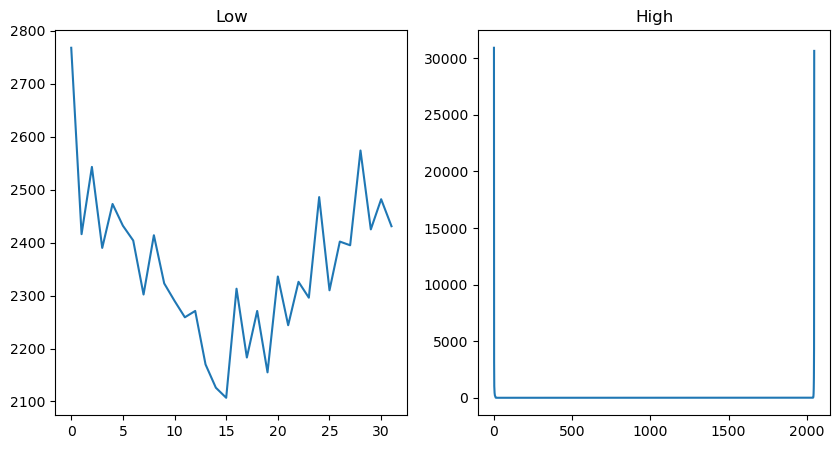

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(low_histogram_error)
axs[0].set_title('Low')
axs[1].plot(high_histogram_error)
axs[1].set_title('High')

In [9]:
low_histogram_code, high_histogram_code = get_splitted_histograms(code,bit)

In [10]:
with np.printoptions(threshold=np.inf):
    print(high_histogram_code)

[45608 15916  5005  2551  1633  1200   847   625   459   360   233   185
   142   115    98    81    47    53    49    41    26    19    14     4
     2     1     0     1     0     1     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     1     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

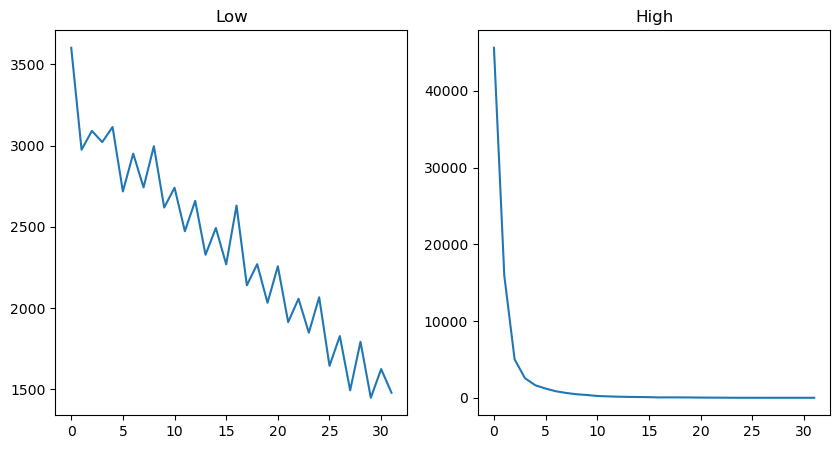

In [11]:
plot_histograms(low_histogram_code, high_histogram_code[:32], bit)

In [12]:
print(low_histogram_code)

[3603 2975 3091 3022 3115 2718 2951 2743 2997 2619 2741 2473 2660 2328
 2493 2269 2631 2140 2270 2032 2257 1913 2057 1848 2066 1644 1827 1493
 1792 1447 1624 1478]


In [13]:
p = estimate_geometric_param(code & ((1 << bit) - 1))
print(p)

0.07452332657200811


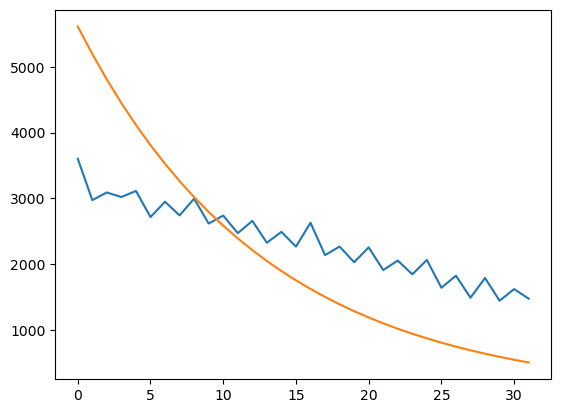

In [14]:
plt.plot(low_histogram_code)
plt.plot(geom.pmf(np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))[:len(low_histogram_code)],p)*len(code))

[3244.35795455  -57.4646261 ]


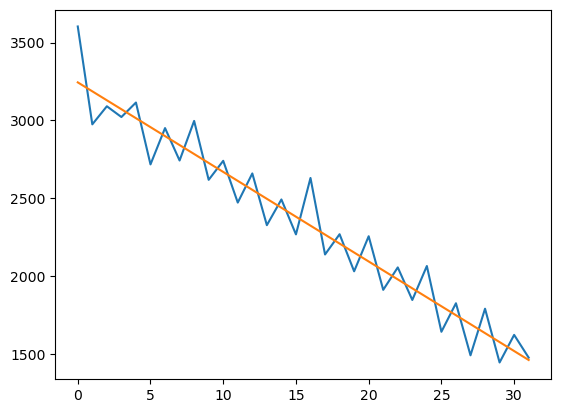

In [15]:
from itertools import repeat


linear_part = code & 31
linear_histogram = np.bincount(linear_part) 
plt.plot(linear_histogram)
foo = lstsq(np.column_stack((
                list(repeat(1,32)),
                range(32))
            ),linear_histogram)[0]
n = foo[0]
m = foo[1]
print(foo)
plt.plot(list(map(lambda x: m*x+n, range(32))))

In [16]:
(low_0, high_0), (low_1, high_1) = get_contextualised_histograms(signal_data[0], 6)

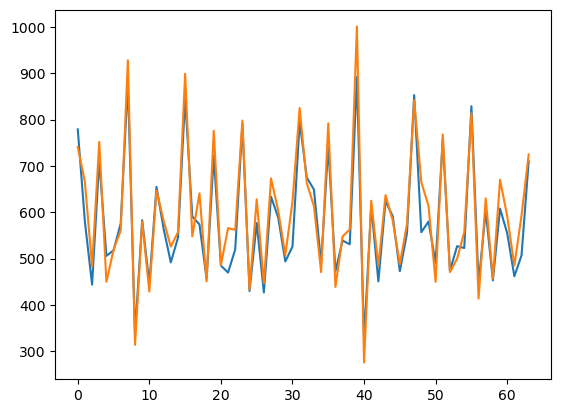

In [17]:
plt.plot(low_0)
plt.plot(low_1)

In [18]:
(low_0, high_0), (low_1, high_1) = get_contextualised_histograms(code, 5)

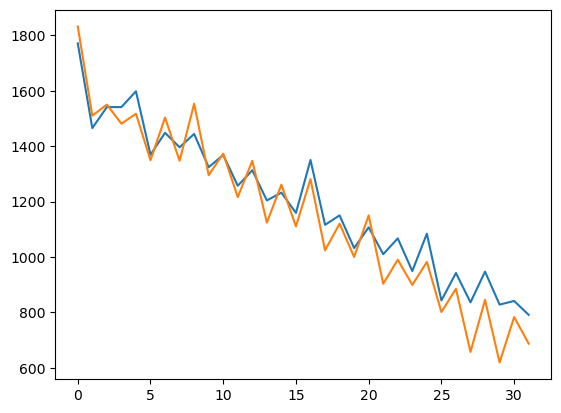

In [19]:
plt.plot(low_0)
plt.plot(low_1)
foo = lstsq(np.column_stack((
                list(repeat(1,32)),
                range(32))
            ),low_0)[0]
n = foo[0]
m = foo[1]
#print(foo)
#plt.plot(list(map(lambda x: m*x+n, range(32))))

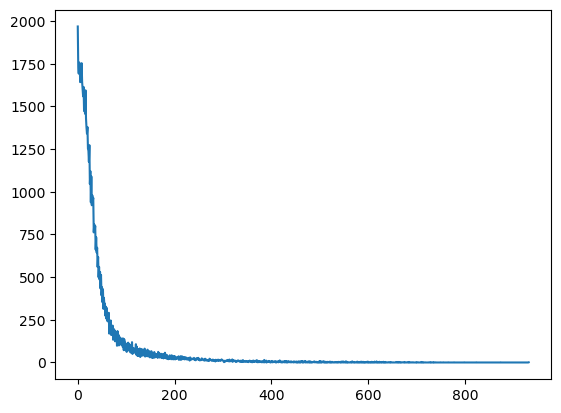

In [20]:
low = code & 0x0F
middle_low = code & 0x03FF
middle_high = code & 0x0F00
high = code & 0xF000

plt.plot(np.bincount(middle_low))

In [21]:
#plt.plot(fft(signal_data[0]))

In [22]:
bit2 = 8

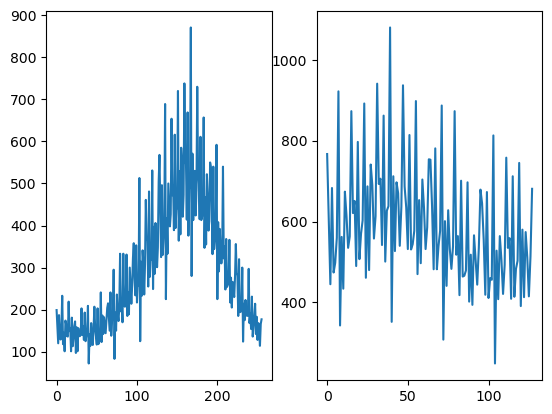

In [23]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(np.bincount(signal_data[0] & ((1 << 8) - 1)))
axs[1].plot(np.bincount(signal_data[0] & ((1 << 7) - 1)))

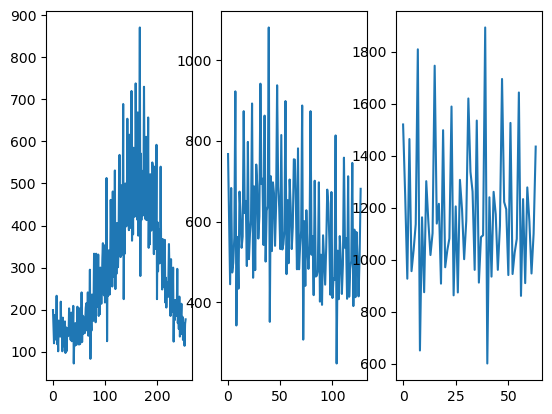

In [24]:
fig, axs = plt.subplots(1, 3)
axs[0].plot(np.bincount(signal_data[0] & ((1 << 8) - 1)))
axs[1].plot(np.bincount(signal_data[0] & ((1 << 7) - 1)))
axs[2].plot(np.bincount(signal_data[0] & ((1 << 6) - 1)))

In [25]:
xs = code & ((1 << 7) - 1)
xss = np.bincount(xs) #/ (80000 * 5)
fitted_halfnorm = halfnorm(np.std(code & 0xff))

hf_in = np.linspace(0,(1 << 7),1000)



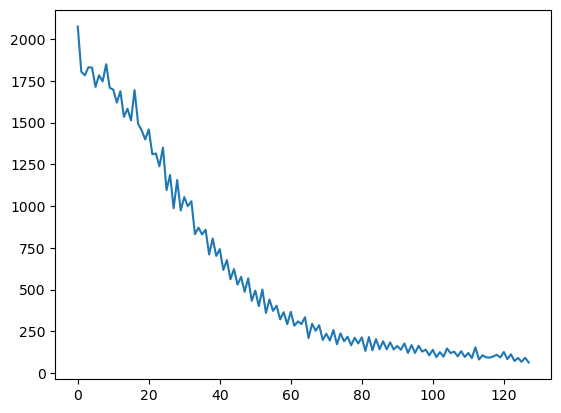

In [26]:
plt.plot(xss)
#figs, axs = plt.subplots(1,2)
#axs[0].plot(xss)
#axs[1].plot(hf_in, halfnorm.pdf(hf_in, scale=np.std(xs)))

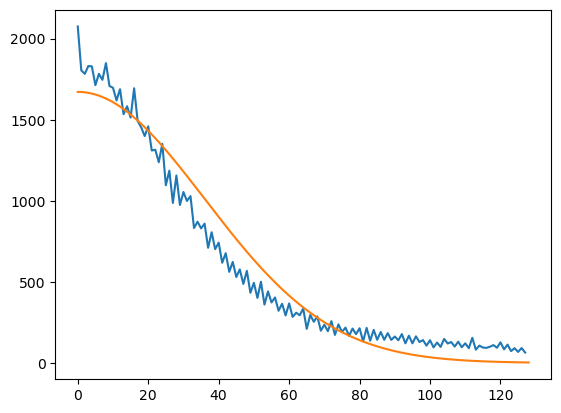

In [27]:
plt.plot(xss)
plt.plot(hf_in, halfnorm.pdf(hf_in, scale=np.std(xs) + 8) * len(code))